<a href="https://colab.research.google.com/github/emmaafarrington/UT_AI-MachineLearning/blob/Personal-Projects/NeuralNetworksModelingProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
# Importing Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# reading the dataset
ds = pd.read_csv('/content/drive/MyDrive/AI & Machine Learning/Churn.csv')

## Data Overview

#### Displaying the first few rows of the dataset

In [ ]:
# displaying the first 10 rows of the data
ds.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
# displaying the last 10 rows of the data
ds.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Checking the shape of the dataset


In [ ]:
# checking the number of rows and columns in the training data
ds.shape

(10000, 14)

* The dataset has 10000 rows and 14 columns

### Checking the data types of the columns in the dataset

In [ ]:
# checking data types of columns
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


####**Observations:**
* Columns like CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, and EstimatedSalary are numeric features.
* There are no missing values.
* Columns like Surname, Geography, and Gender are categorical features.

####**Conclusions:**
* Depending on the specific objectives of the analysis (i.e.: predicting customer churn), further preprocessing steps such as feature scaling, encoding categorical variables, and feature engineering may be necessary before building predictive models.

### Checking the Statistical Summary

In [ ]:
# Set display options to suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
# checking the statistical summary for numerical data
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.00,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
CustomerId,10000.00,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00
CreditScore,10000.00,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.00,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.00,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.00,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.00,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.00,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.00,100090.24,57510.49,11.58,51002.11,100193.91,149388.25,199992.48


####**Observations:**

RowNumber:
* The data ranges from 1 to 10,000, indicating the index of each row in the dataset.
* There is no skewness observed, and the data is evenly distributed across the range.

CustomerId:
* The data represents unique customer IDs, ranging from 15,565,701 to 15,815,690.
* These may all be unique values, which we will look into.

CreditScore:
* Credit scores range from 350 to 850, with a mean of 650.53.
* The distribution appears relatively normal without any significant skewness.

Age:
* Age ranges from 18 to 92, with a mean of 38.92.
* There is a slight right skewness, indicating a higher frequency of younger customers.

Tenure:
* Tenure represents the number of years a customer has been with the bank, ranging from 0 to 10.
* The distribution is relatively uniform across different tenures without any noticeable skewness.

Balance:
* Account balances range from 0 to 250,898.09, with a mean of 76,485.89.
* The data shows a right skewness, indicating that a significant portion of customers may have low balances, while few have very high balances.

NumOfProducts:
* The number of products ranges from 1 to 4, with a mean of 1.53.
* The distribution appears relatively uniform without significant skewness.

HasCrCard:
* This binary variable indicates whether a customer has a credit card (1) or not (0).
* The data is slightly skewed towards customers having a credit card, with a mean of 0.71.

IsActiveMember:
* Indicates whether a customer is an active member (1) or not (0).
* The data shows a relatively balanced distribution between active and inactive members.

EstimatedSalary:
* Estimated salaries range from 11.58 to 199,992.48, with a mean of 100,090.24.
* The data appears to be right-skewed, indicating that there may be a larger proportion of customers with lower estimated salaries.

Exited:
* This binary variable indicates whether a customer left the bank (1) or not (0) within the last six months.
* The data shows a skew towards customers who did not leave the bank, with a mean of 0.20.

### Checking for Missing Values

In [ ]:
# checking for missing entries in train data
ds.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* There are no missing values in the data.

### Checking for Duplicate Values

In [ ]:
# check for duplicate values
ds.duplicated().sum()

0

* There are no duplicate values in the data.

### Checking for Unique Values

In [ ]:
# checking for unique values for each column
ds.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

* RowNumber and CustomerID are unique. Therefore, we should drop these values.
* Surname is likely not relevant to this dataset and will not provide any additional value, so we will drop this as well.

In [ ]:
# making a copy of the original dataset
df = ds.copy()

In [ ]:
# dropping unique values from the copy dataset
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [ ]:
# dropping unique values from the original dataset
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Replacing Categorical Variables for Analysis

In [ ]:
# Replacing values in Exited with descriptive data for analysis
# Replace 0 with 'No' (didn't leave bank) and 1 with 'Yes' (Left bank)
df['Exited'] = df['Exited'].replace({0: 'No', 1: 'Yes'})

In [ ]:
# Replacing values in HasCrCard with descriptive data for analysis
# Replace 0 with 'No' (doesn't have CC) and 1 with 'Yes' (Has CC)
df['HasCrCard'] = df['HasCrCard'].replace({0: 'No', 1: 'Yes'})

In [ ]:
# Replacing values in IsActiveMember with descriptive data for analysis
# Replace 0 with 'No' (not active) and 1 with 'Yes' (active)
df['IsActiveMember'] = df['IsActiveMember'].replace({0: 'No', 1: 'Yes'})

In [ ]:
# checking datatypes for new dataset
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard           object
IsActiveMember      object
EstimatedSalary    float64
Exited              object
dtype: object

In [ ]:
# checking datatypes for old dataset
ds.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes
3,699,France,Female,39,1,0.00,2,No,No,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No
5,645,Spain,Male,44,8,113755.78,2,Yes,No,149756.71,Yes
6,822,France,Male,50,7,0.00,2,Yes,Yes,10062.80,No
7,376,Germany,Female,29,4,115046.74,4,Yes,No,119346.88,Yes
8,501,France,Male,44,4,142051.07,2,No,Yes,74940.50,No
9,684,France,Male,27,2,134603.88,1,Yes,Yes,71725.73,No


* We can see that the categorical variables have been changed to yes and no for EDA.

#### Observations on CreditScore

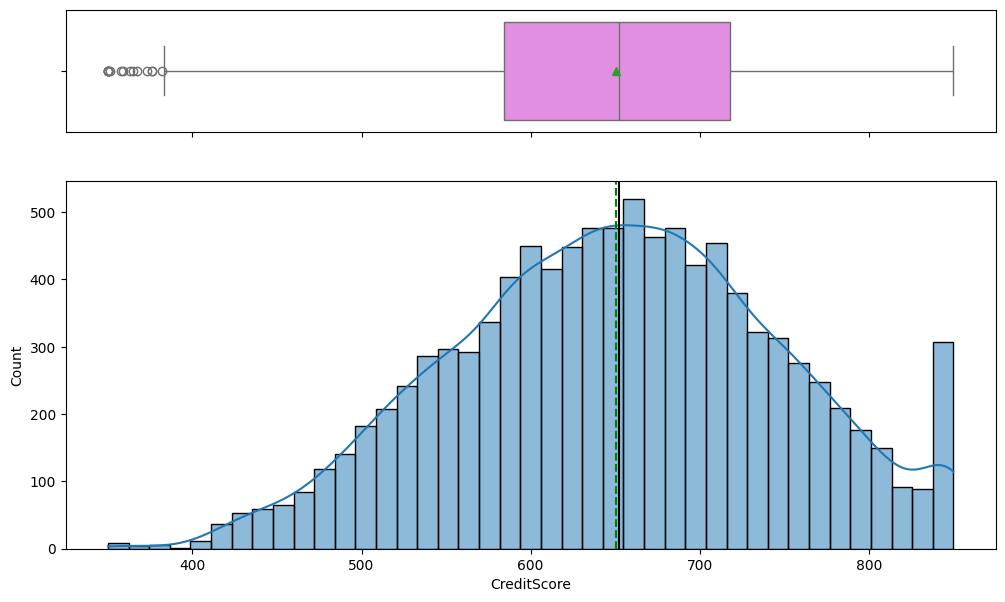

In [ ]:
# histogram for creditscore
histogram_boxplot(df,'CreditScore', kde=True)

#### **Observations:**
* Data appears slightly left skewed with a lot of outliers on the lower end.
* Appears to have a relatively normal distribution with most credit scores falling between 590 and 730.

####**Conclusions:**
* For most individuals, their credit scores are clustered around the average, indicating typical creditworthiness.
* The outliers on the right side represent individuals with exceptionally high credit scores, which could indicate a very low credit risk or exceptional financial stability.

#### Observations on Age

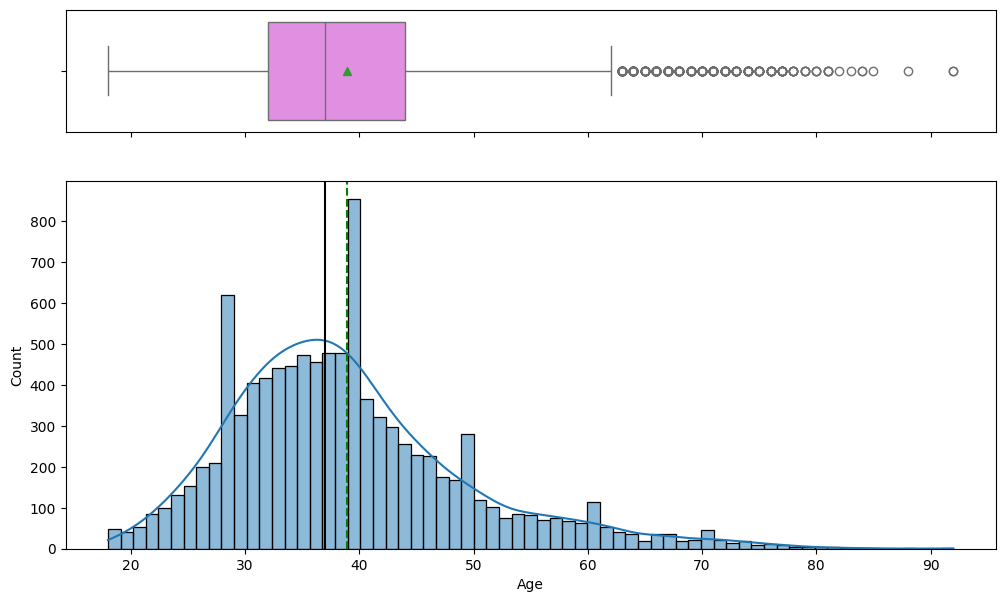

In [ ]:
# histogram for Age
histogram_boxplot(df,'Age', kde=True)

#### **Observations:**
* The average customer age is around 37 years.
* Most customers are middle aged, from around 32-44 years old.  
* Outliers on the right side of the distribution
represent individuals with ages that are significantly higher than the majority of the population.

#### **Conclusions:**
* Most customers are middle aged.
* Outliers could indicate elderly individuals or individuals with unusual circumstances resulting in higher ages.

#### Observations on Balance

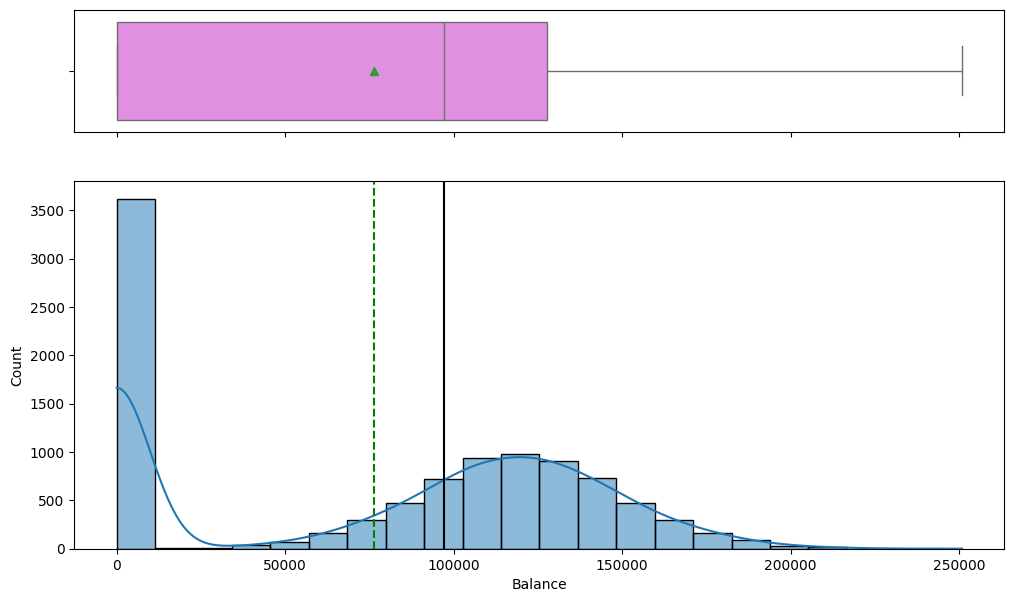

In [ ]:
# histogram for balance
histogram_boxplot(df,'Balance', kde=True)

#### **Observations:**
* The presence of a peak at 0 balance indicates that there is a significant number of accounts with no balance or very low balances.
* The graph suggests that for accounts with non-zero balances, the distribution of balances is relatively evenly spread out, with no significant skewness or outliers.

#### **Conclusions:**
* The presence of a large number of accounts with 0 balance or very low balances might indicate potential issues such as inactive accounts, recent account openings, or accounts with minimal activity.
* Further investigation into the accounts with 0 balance or very low balances could provide insights into customer behavior, account usage patterns, or potential areas for targeted marketing or customer engagement efforts.

#### Observations on Estimated Salary

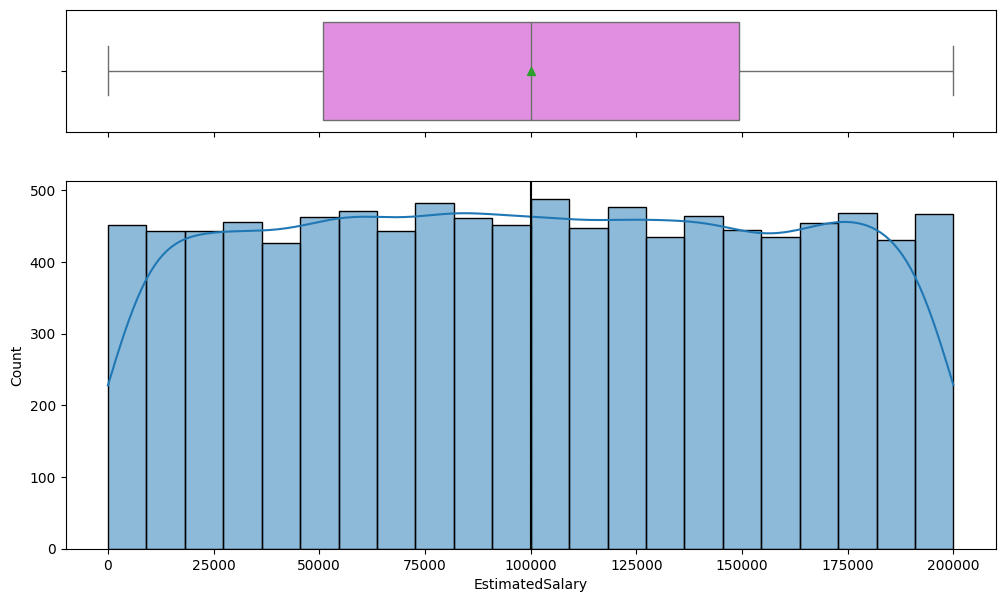

In [ ]:
# histogram for estimated salary
histogram_boxplot(df, 'EstimatedSalary', kde=True)

#### **Observations:**
* Each range or category of estimated salaries contains a similar number of observations.
* There are no significant concentrations of salaries in specific ranges, indicating that salaries are distributed uniformly across the dataset from 0-200,000 dollars, with the average falling around 100,000.

#### **Conclusions:**
* Further analysis and comparison with external factors or industry standards may be necessary to assess the significance of the observed uniform distribution and its implications for decision-making or analysis.
* We should confirm whether the customer is estimating their salary or whether the bank is estimating their salary based on industry averages.

#### Observations on Exited

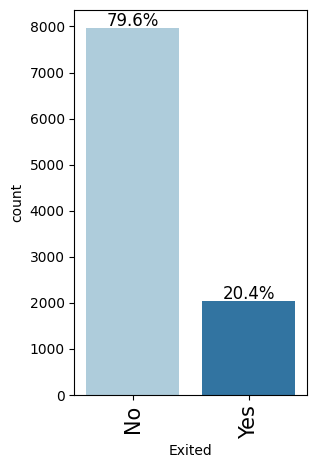

In [ ]:
# barplot for whether a customer left the bank in the last 6 months
labeled_barplot(df,'Exited', perc=True)

#### **Observations:**
* 79.9% of customers did not leave the bank, while 20.4% did leave the bank.

#### Observations on Geography

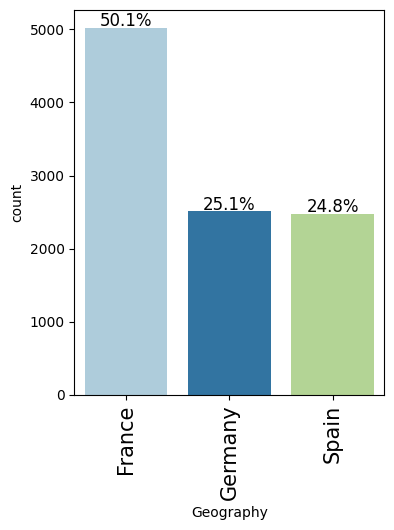

In [ ]:
# barplot for a customer's location
labeled_barplot(df,'Geography', perc=True)

#### **Observations:**
* 50% of customers are from France, and the other half are divided between Germany and Spain fairly evenly.

#### Observations on Gender

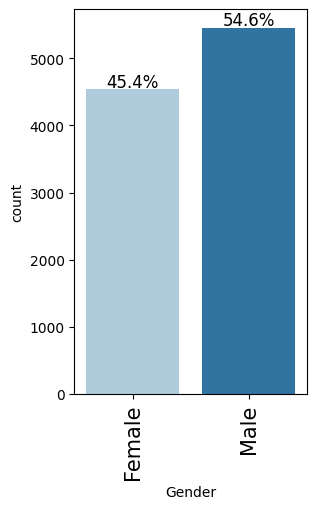

In [ ]:
# barplot for a customer's gender
labeled_barplot(df,'Gender', perc=True)

#### **Observations:**
* There are about 9% more male customers than there are female customers.


#### Observations on Tenure

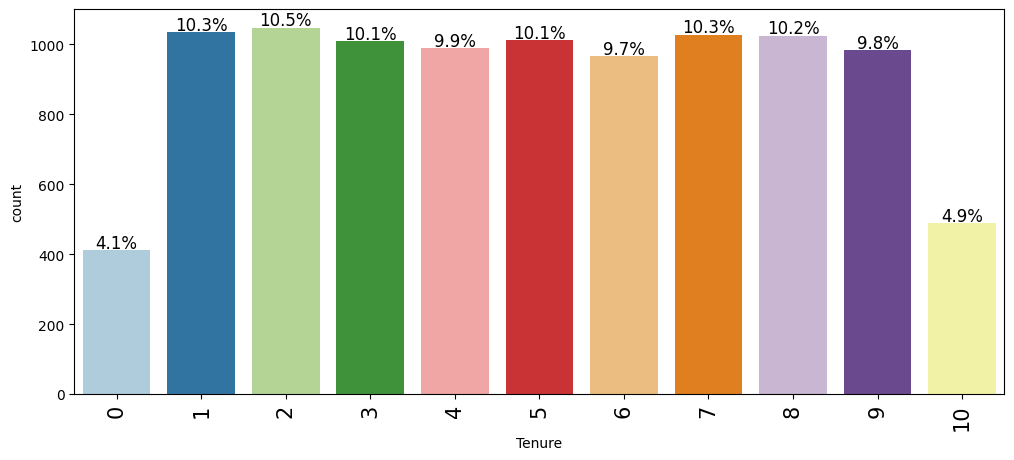

In [ ]:
# barplot for number of years in which the customer has been with the bank
labeled_barplot(df,'Tenure', perc=True)

#### **Observations:**
* The customer tenure is pretty spread out with dips in the data at 0 years and 10 years.
* This suggests that there are fewer customers that are brand new to the bank, as well as fewer customers who have been with the bank for over 9 years relative to the total customer population.

#### Observations on Number of Products

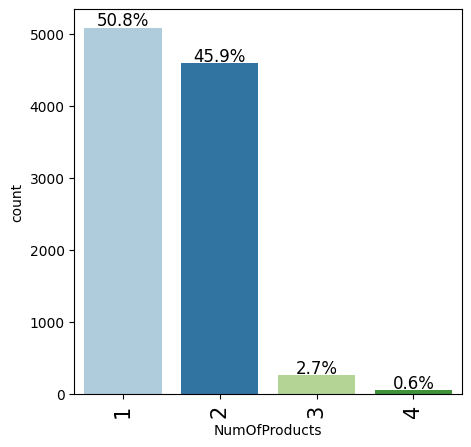

In [ ]:
# barplot for number of products a customer has purchased thru the bank
labeled_barplot(df,'NumOfProducts', perc=True)

#### **Observations:**
* 50.8% of customers only have one product with the bank, followed closely by customers with 2 products.

#### **Conclusions:**
* We should consider how many products the bank offers, and if customers with more products are less likely to churn.

#### Observations on Has Credit Card

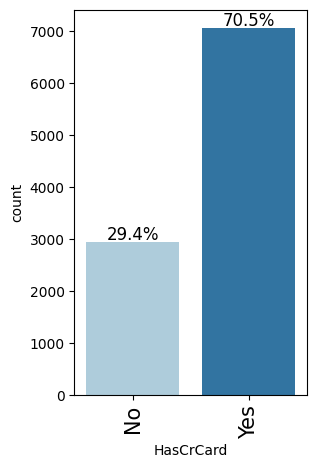

In [ ]:
# barplot for whether a customer has a credit card or not
labeled_barplot(df,'HasCrCard', perc=True)

#### **Observations:**
* 70.5% of customers have a credit card with the bank.
* 29.4% of customers do not have a credit card with the bank.

#### **Conclusions:**
* Given that the majority of customers do have credit cards, should see whether having a credit card has a significant impact on whether a customer leaves the bank or not.

#### Observations on Is Active Member

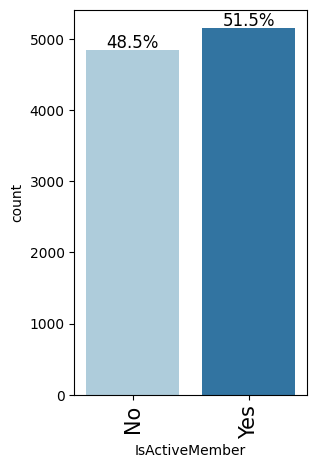

In [ ]:
# barplot for whether a customer is actively using bank products, making transactions, etc
labeled_barplot(df,'IsActiveMember', perc=True)

#### **Observations:**
* 51.5% of customers are actively using bank products, making transactions, etc., while the other 48.5% of customers are not.

#### **Conclusions:**
* The bank has a significant portion of its customer base actively engaged with its products and services. This indicates that a majority of customers find value in the bank's offerings and continue to use them regularly.

* While having over half of the customer base actively engaged is positive, there is still a sizable proportion (48.5%) of customers who are not actively using bank products.
* This suggests potential areas for improvement in engaging with these customers, understanding their needs better, and offering products or services that cater to their preferences.

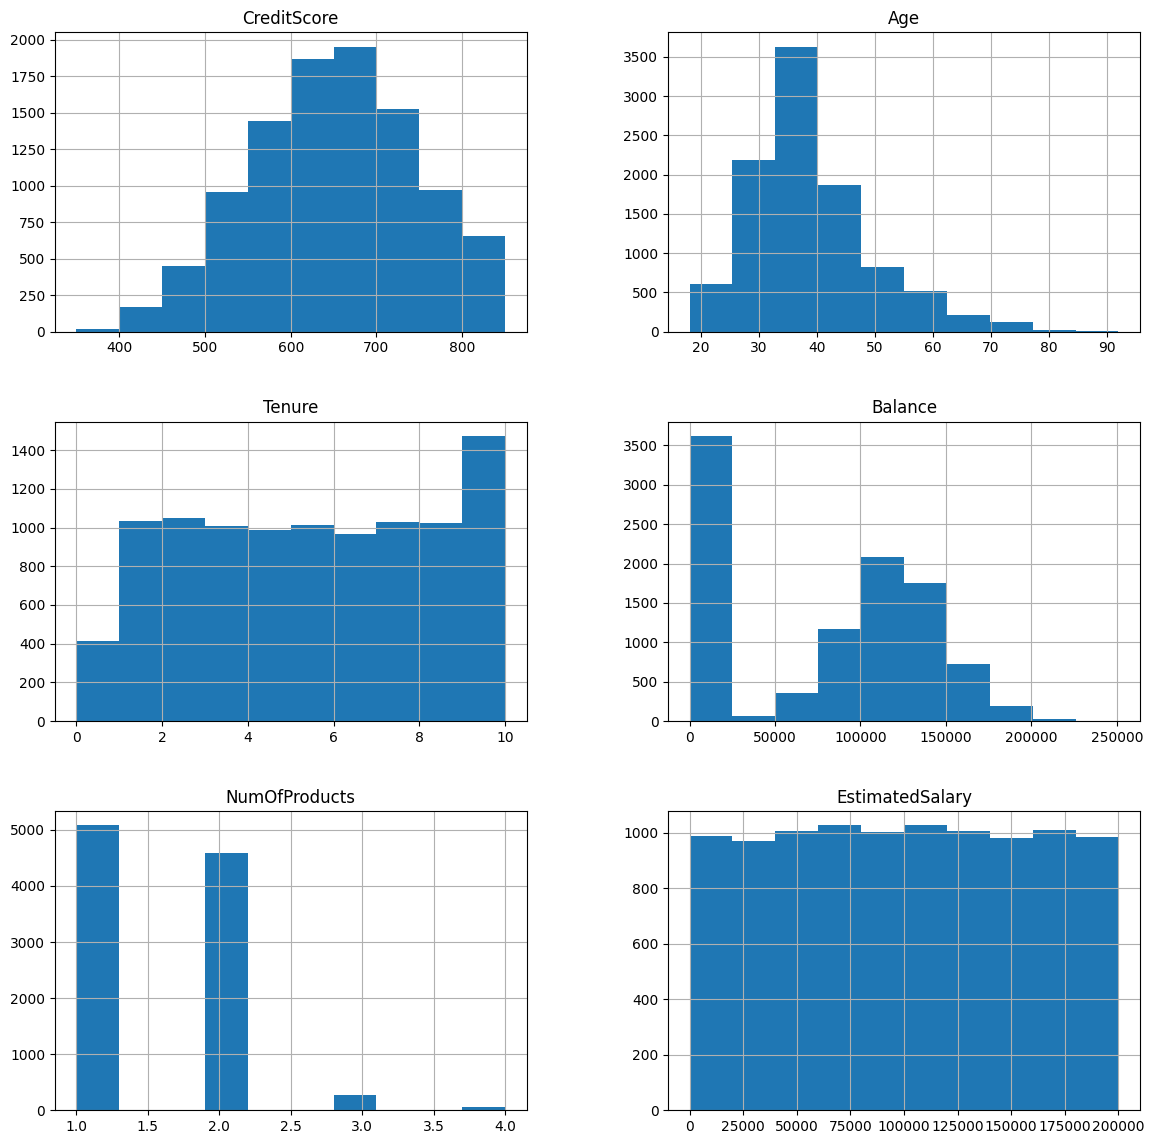

In [ ]:
# creating histograms for numerical values
df.hist(figsize=(14, 14))
plt.show()

### Bivariate Analysis

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation Plot

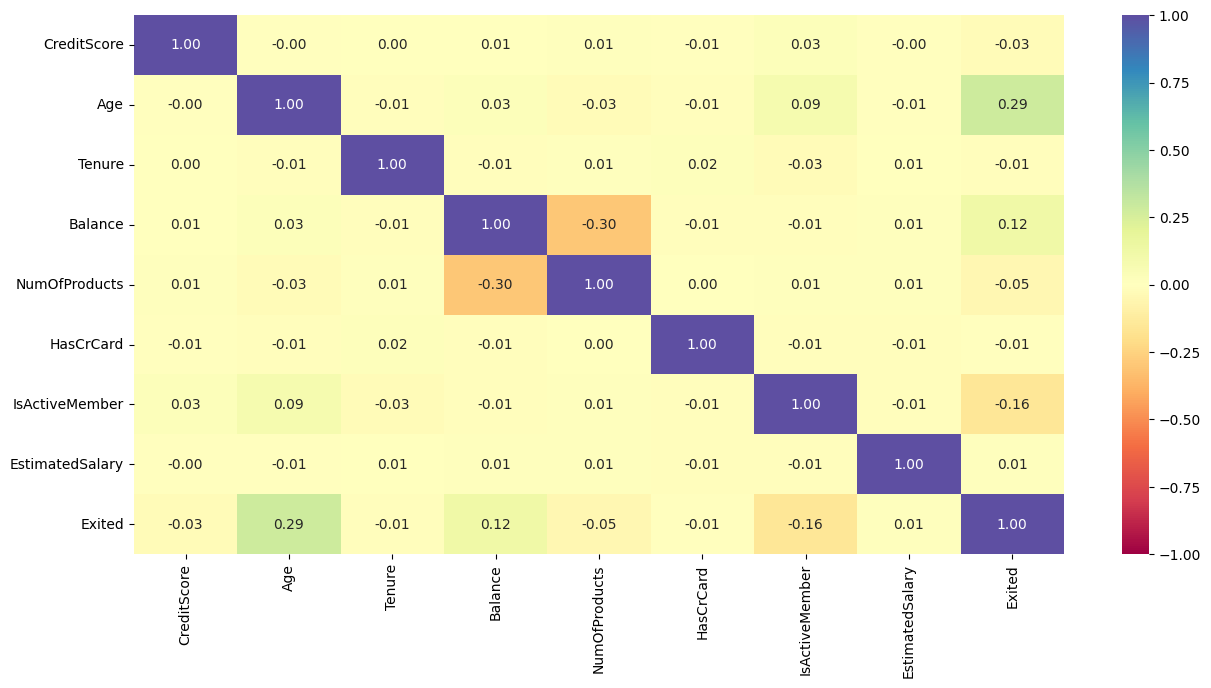

In [ ]:
# Creating a correlation map between numerical values

# selecting numerical values
numeric_ds = ds.select_dtypes(include=['number'])

# plotting heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(numeric_ds.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### **Observations:**
* There does not appear to be any strong correlations between the numerical variables.
* NumOfProducts & Balance:
  * The correlation coefficient of -0.30 indicates a moderate strength of the relationship between account balance and number of products, which suggests that customers with fewer products tend to have higher account balances, and vice versa.
* Age and Exited:
  * A correlation coefficient of 0.29 suggests a moderate strength of association between age and the likelihood of exiting.
  * This suggests that as age increases, the likelihood of a customer exiting the bank also tends to increase.

#### **Conclusions:**
* While correlation between NumOfProducts and Balance is not a very strong, it's still significant enough to suggest a discernible pattern in the data.
  * This could imply that customers who have multiple products with the bank (savings accounts, loans, credit cards, etc.) may spread their funds across various accounts or may have lower balances due to debt obligations or investment diversification.
*  While age is positively correlated with the probability of exiting the bank, it's important to note that correlation does not imply causation.
  * Other factors might also influence the decision to leave the bank, and age might be just one of them.
* Analyzing the reasons behind these correlations, such as customer preferences, surveys, or financial behaviors, could guide the bank in designing tailored financial products and services to meet diverse customer needs.

#### Exited vs Geography

Exited       No   Yes    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


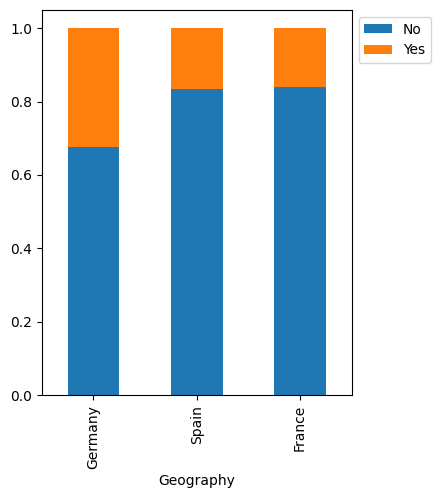

In [ ]:
# stacked barplot for whether a customer exited vs geography
stacked_barplot(df, "Geography", "Exited" )

#### **Observations:**
* 32.46% from Germany exited the bank.
* 16.14% from France exited the bank.
* 16.68% from Spain exited the bank.

* There is a significant variation in the exit rates across different geographical regions. Germany has the highest exit rate, followed by Spain and France.

#### **Conclusions:**
* This suggests that Geography has an impact on whether a customer leaves the bank or not.
* Various factors such as cultural differences, economic conditions, or the competitive landscape in each country could contribute to the differences in exit rates. Further analysis may be beneficial to identify the specific drivers of customer churn in each region.

#### Exited vs Gender

Exited    No   Yes    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


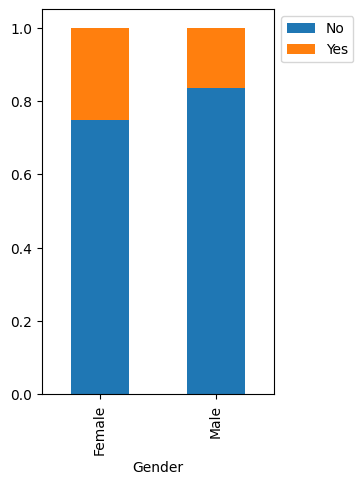

In [ ]:
# stacked barplot for whether a customer exited vs gender
stacked_barplot(df, "Gender", "Exited" )

#### **Observations:**

* 25.07% of female customers exited the bank.
* 16.45% of male customers exited the bank.
* There is a noticeable difference in the exit rates between male and female customers. The exit rate for female customers is higher compared to male customers

#### **Conclusions:**
* The disparity in exit rates may suggest that certain factors or experiences influence female customers' decisions to leave the bank more than male customers. It could be related to the bank's products, services, customer service experiences, or marketing strategies.

* The bank could develop targeted retention strategies for female customers, such as customer surveys and customer satisfaction initiatives.
* They should also work on analyzing demographic and behavioral data to collect additional insights into the factors driving customer churn among different gender groups.

#### Exited Vs Has Credit Card

Exited       No   Yes    All
HasCrCard                   
All        7963  2037  10000
Yes        5631  1424   7055
No         2332   613   2945
------------------------------------------------------------------------------------------------------------------------


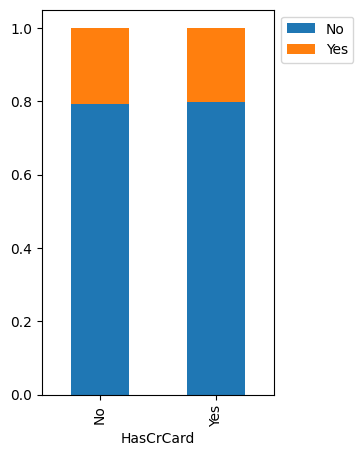

In [ ]:
# stacked barplot for whether a customer exited vs if they have a credit card
stacked_barplot(df, "HasCrCard", "Exited" )

#### **Observations:**
* 20.21% customers with credit cards exited the bank.
* 20.81% customers without credit cards  exited the bank.

#### **Conclusions:**
* The exit rates for customers with and without credit cards are relatively similar, with both groups having exit rates around 20%.
* Having a credit card or not does not appear to be a strong predictor of whether a customer will exit the bank.

#### Exited vs Is Active member

Exited            No   Yes    All
IsActiveMember                   
All             7963  2037  10000
No              3547  1302   4849
Yes             4416   735   5151
------------------------------------------------------------------------------------------------------------------------


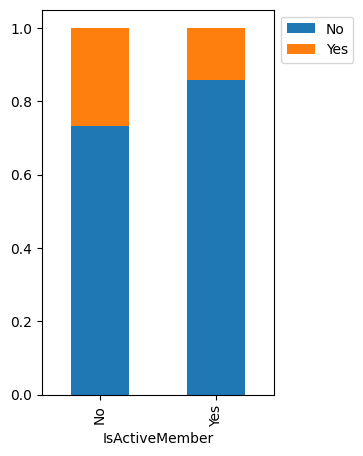

In [ ]:
# stacked barplot for whether a customer exited vs whether they are an active member
stacked_barplot(df, "IsActiveMember", "Exited" )

#### **Observations:**
* 26.85% of inactive customers exited the bank
* 14.27% active customers exited the bank.
* The exit rate for inactive members is significantly higher compared to active members.

#### **Conclusions:**
* Being an active member of the bank appears to be a significant predictor of customer retention. Active members are less likely to exit the bank compared to inactive members.
* The bank may want to focus on engaging inactive members and implementing strategies to increase their activity levels and overall satisfaction to reduce churn, as well as further explore reasons for inactivity among members.

#### Exited Vs Credit Score

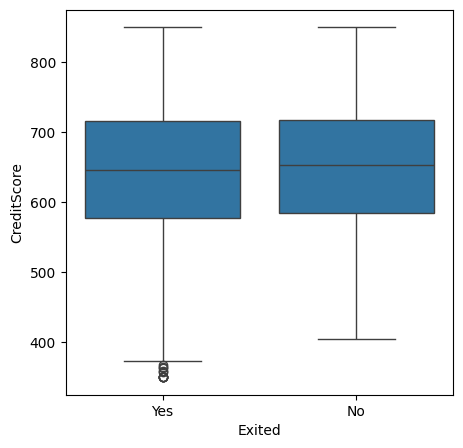

In [ ]:
#boxplot for whether a customer exited vs credit score
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=df)
plt.show()

#### **Observations:**
* The boxplots seem relatively similar as far as distribution goes.
* There are several outliers for those with low credit scores that exited the bank.

#### **Conclusions:**
* Credit score does not seem to have a major impact on whether a customer leaves the bank or not.
* However, for those who did leave the bank there were some amount who had significantly lower credit scores.

#### Exited vs Age


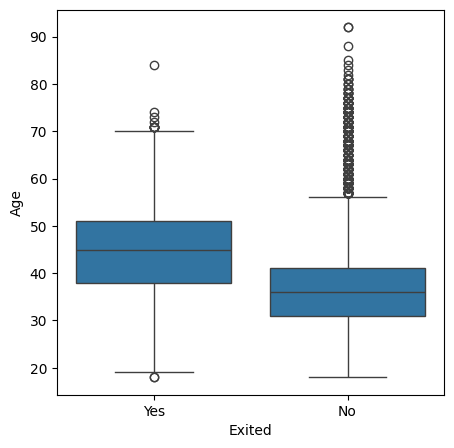

In [ ]:
#boxplot for whether a customer exited vs customer age
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=df)
plt.show()

#### **Observations:**
* Older customers are more likely to leave the bank than middle aged customers.
* The presence of significant outliers in the age distribution suggests that while older customers may be more likely to churn on average, there are exceptions. These outliers could represent loyal or satisfied older customers who have strong ties to the bank despite their age.

#### **Conclusions:**
* There may be a correlation between older age and higher churn rates. This could be due to various factors such as changes in financial needs, life events like retirement, or dissatisfaction with the bank's services.

* The bank may need to segment its customer base by age and tailor retention strategies accordingly. For instance, special offers or personalized services could be targeted towards older customers to enhance their loyalty.
* Engaging with older customers through targeted communication and support channels may help strengthen their loyalty and reduce churn.

#### Exited vs Tenure

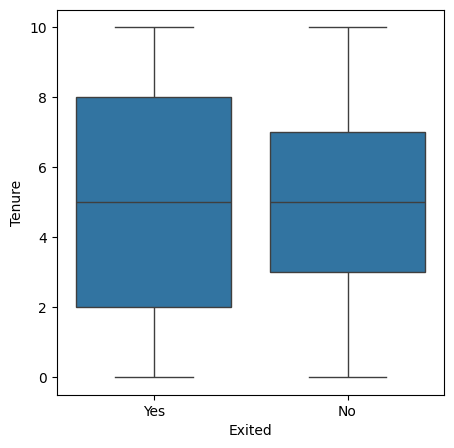

In [ ]:
#boxplot for whether a customer exited vs tenure
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=df)
plt.show()

#### **Observations:**
* There are no outliers in the distribution.
* The average tenure for customers who left the bank and who stayed both fall around 5 years.
* There is more variation in the data amongst customers who left, with most of the customers having been with the bank between 2-8 years, while customers who stayed have been with the bank for 3-7 years.

#### **Conclusions:**
* The similar average tenure of around 5 years for both customers who left and those who stayed indicates that, on average, customers tend to remain with the bank for a similar duration before making a decision to leave or stay.
* The narrower range of tenures among customers who stayed suggests that there may be certain thresholds or milestones in the customer journey that influence their decision to remain with the bank.
* The concentration of tenures between 3-7 years for customers who stayed may indicate a period of stability or satisfaction with the bank's offerings.

* Analyzing the factors contributing to customer churn within specific tenure ranges can help identify areas for improvement in service delivery or product offerings.

#### Exited vs Balance

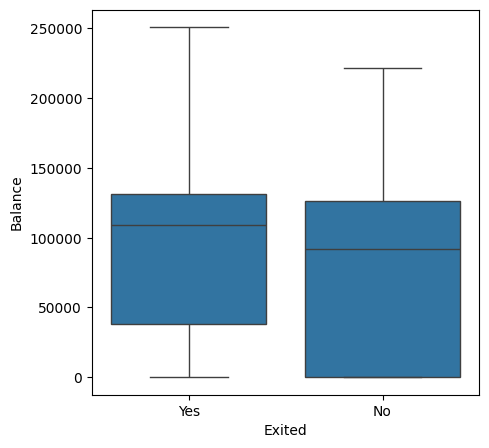

In [ ]:
#boxplot for whether a customer exited vs account balance
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=df)
plt.show()

#### **Observations:**
* There are no outliers in the data.
* Most of the customers who stayed with the bank have an account balance between 0 and around 130,000 dollars.
* Those who left had a balance between around 40,000 and 140,000 dollars, indicating that they had relatively higher account balances compared to those who stayed.
* There are a significant amount of customers who stayed with the bank that have a balance of 0.

#### **Conclusions:**

* The presence of a significant number of customers who stayed with a balance of 0 dollars suggests that there may be specific reasons for maintaining such accounts, such as savings or investment accounts with low or no balances. It could also indicate that these customers utilize other financial products or services offered by the bank, despite having a zero balance in their account.

* Customers with lower balances may require different types of financial products or services, and targeted efforts can be made to meet their needs and improve retention.
* Customers with higher balances may represent a segment of the market that requires more personalized attention and premium services to ensure their satisfaction and loyalty.

* Further analysis should be conducted to determine reasons behind maintaining accounts with zero balances, as well as provide insights into customer preferences and behaviors.

#### Exited vs Number of Products

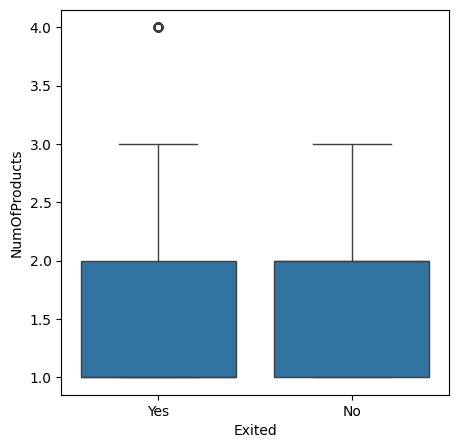

In [ ]:
#boxplot for whether a customer exited vs
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=df)
plt.show()

#### **Observations:**
* The number of products does not appear to have an impact on whether a customer leaves the bank or not.


#### Exited vs Estimated Salary

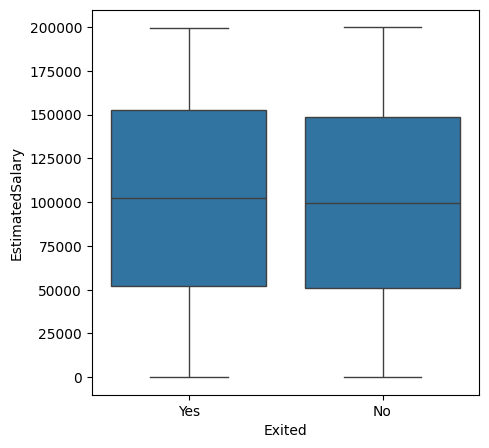

In [ ]:
#boxplot for whether a customer exited vs estimated salary
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=df)
plt.show()

#### **Observations:**
* These boxplots appear to be almost uniform.
#### **Conclusions:**
* Estimated salary does not appear to have an impact on whether a customer exits the bank.

## Data Preprocessing

### Train-validation-test Split

In [ ]:
X = ds.drop(['Exited'],axis=1) # Credit Score through Estimated Salary
y = ds['Exited'] # Exited

In [ ]:
# Splitting the dataset into the Training and Testing set

#Splitting X and y to obtain test set
X_large, X_test, y_large, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y,shuffle = True)

In [ ]:
# Splitting X_large and y_large to obtain the Training and Validation set.

X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = 0.2, random_state = 42,stratify=y_large, shuffle = True)

In [ ]:
# checking shape for X
print(X_train.shape, X_val.shape, X_test.shape)

(6400, 10) (1600, 10) (2000, 10)


In [ ]:
# checking shape for y
print(y_train.shape, y_val.shape, y_test.shape)

(6400,) (1600,) (2000,)


### Dummy Variable Creation

In [ ]:
# encoding categorical variables
ds.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
# Encoding Geography variable
X_train = pd.get_dummies(X_train, columns=["Geography","Gender"],drop_first=True)
X_test = pd.get_dummies(X_test, columns=["Geography","Gender"],drop_first=True)   ## Encoding Geography and Gender in test set
X_val = pd.get_dummies(X_val, columns=["Geography","Gender"],drop_first=True)     ## Encoding Geography and Gender in validation set

# Convert the boolean columns to integer (0 or 1)
X_train = X_train.astype(int)
X_test = X_test.astype(int)
X_val = X_val.astype(int)

### Data Normalization

In [ ]:
# defining the list of columns to normalize
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

# creating an instance of the standard scaler
sc = StandardScaler()

X_train[cols_list] = sc.fit_transform(X_train[cols_list])
X_val[cols_list] = sc.transform(X_val[cols_list]) ## Specifying which columns to normalize
X_test[cols_list] = sc.transform(X_test[cols_list]) ## Specifying which columns to normalize


In [ ]:
# checking top 5 rows
X_train.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
3006,0.99,0.57,-1.38,0.61,1,1,0,1.57,0,0,0
5735,-0.68,0.48,-0.36,-1.24,2,0,1,0.04,0,1,0
5652,0.41,-0.95,1.36,-1.24,2,0,0,1.75,0,0,0
26,1.08,-0.28,-1.04,0.96,1,1,1,1.23,1,0,1
3596,-0.09,-0.28,-1.73,1.14,1,0,0,-0.76,0,0,1
3196,-0.43,-0.28,-0.36,0.84,2,1,0,0.05,0,0,1
2939,-1.22,0.00,-1.04,-1.24,1,0,1,-0.45,0,0,0
9601,0.08,-0.57,0.67,0.21,1,1,0,0.64,0,0,0
5290,1.48,1.62,1.36,0.28,1,1,0,-1.23,1,0,0
3180,0.28,2.00,1.70,0.66,1,1,0,0.84,0,0,0


## Model Building

### Model Evaluation Criterion

**A model can make wrong predictions in the following ways:**

* Predicting churn when the customer does not actually churn, which can lead to unnecessary intervention costs.
* Failing to predict churn when the customer actually churns, resulting in negative effects such as lost revenue or potential reputational damage.

**Which case is more important?**
* In bank churn prediction, correctly identifying customers who are likely to churn (true positives) is crucial for taking proactive measures to retain them. However, misclassifying loyal customers as churned (false positives) can lead to unnecessary intervention efforts and potentially annoy customers.

**How to reduce this loss - i.e. need to reduce False Negatives as well as False Positives?**
* F1 Score combines both precision and recall into a single metric, making it suitable for imbalanced datasets where the classes are unevenly distributed.
* F1 Score also strikes a balance between precision (the proportion of correctly identified churned customers among all predicted churned customers) and recall (the proportion of correctly identified churned customers among all actual churned customers), making it a suitable metric for this scenario.


In [ ]:
# Creating function for plotting the confusion matrix
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [ ]:
# blank dataframes to store recall values for all models we build
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

### Neural Network with SGD Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_0 = Sequential()
# Adding the input layer with 64 neurons and relu as activation function
model_0.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
# add a hidden layer (specifying 32 neurons and the activation function)
model_0.add(Dense(32, activation='relu'))
# adding the output layer with the number of neurons required
model_0.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Defining SGD as the optimizer with a learning rate of 0.01
optimizer = tf.keras.optimizers.SGD(0.01)

# selecting the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [ ]:
#compiling the model with binary cross entropy as loss function and recall as the metric
model_0.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Fitting the ANN

history_0 = model_0.fit(
    X_train, y_train,
    batch_size=64,    ## specify the batch size of 64
    validation_data=(X_val,y_val),
    epochs=25,    ## 25 epochs
    verbose=1
)


Epoch 1/25
100/100 [==============================] - 2s 9ms/step - loss: 0.5449 - recall: 0.0107 - val_loss: 0.5030 - val_recall: 0.0000e+00
Epoch 2/25
100/100 [==============================] - 1s 6ms/step - loss: 0.4901 - recall: 0.0000e+00 - val_loss: 0.4833 - val_recall: 0.0000e+00
Epoch 3/25
100/100 [==============================] - 0s 4ms/step - loss: 0.4742 - recall: 0.0000e+00 - val_loss: 0.4710 - val_recall: 0.0000e+00
Epoch 4/25
100/100 [==============================] - 0s 4ms/step - loss: 0.4627 - recall: 0.0031 - val_loss: 0.4619 - val_recall: 0.0031
Epoch 5/25
100/100 [==============================] - 0s 4ms/step - loss: 0.4538 - recall: 0.0084 - val_loss: 0.4550 - val_recall: 0.0092
Epoch 6/25
100/100 [==============================] - 0s 4ms/step - loss: 0.4468 - recall: 0.0245 - val_loss: 0.4495 - val_recall: 0.0368
Epoch 7/25
100/100 [==============================] - 0s 4ms/step - loss: 0.4412 - recall: 0.0483 - val_loss: 0.4453 - val_recall: 0.0460
Epoch 8/25
100

**Loss Function**


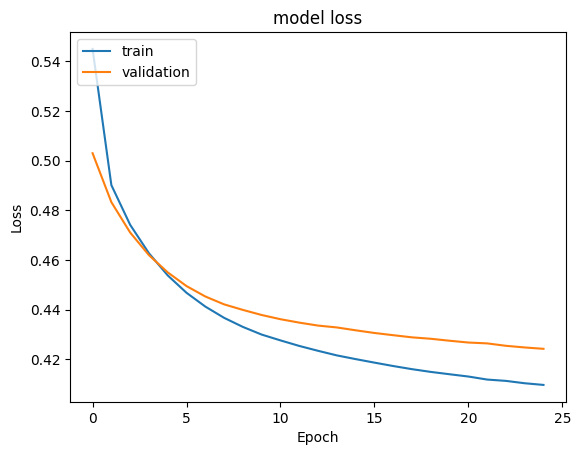

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

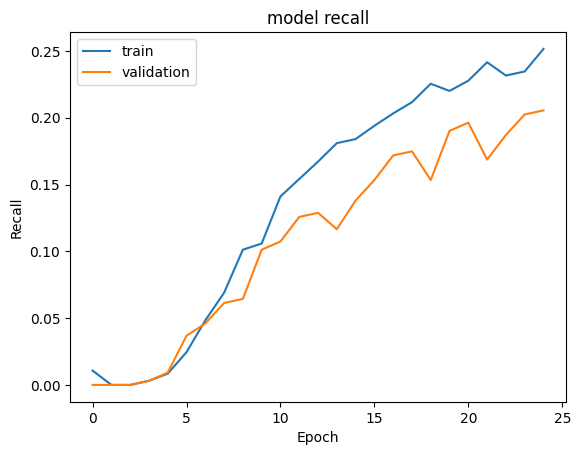

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_0.history['recall'])
plt.plot(history_0.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#Predicting the results using best as a threshold
y_val_pred = model_0.predict(X_val)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

**Classification Report:**


In [ ]:
#classification report for train data
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      5096
           1       0.68      0.25      0.36      1304

    accuracy                           0.82      6400
   macro avg       0.76      0.61      0.63      6400
weighted avg       0.80      0.82      0.79      6400



In [ ]:
#classification report for validation data
cr=classification_report(y_val, y_val_pred)   ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1274
           1       0.66      0.21      0.31       326

    accuracy                           0.82      1600
   macro avg       0.74      0.59      0.60      1600
weighted avg       0.79      0.82      0.78      1600



**Confusion Matrix**

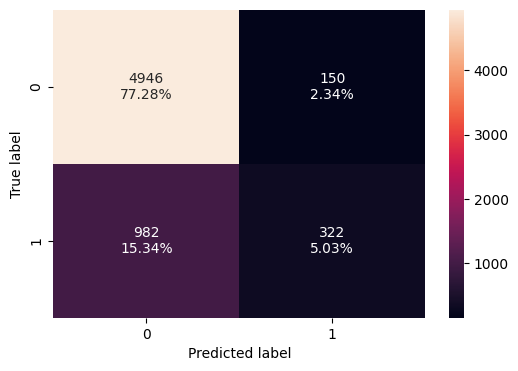

In [ ]:
#confusion matrix for training set
make_confusion_matrix(y_train, y_train_pred)

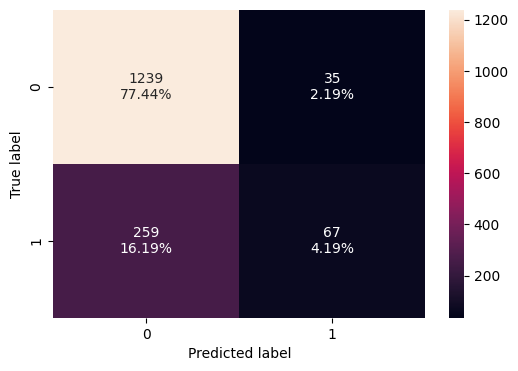

In [ ]:
# confusion matrix for validation set
make_confusion_matrix(y_val, y_val_pred)

####**Observations:**


*

####**Conclusions:**
*

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_1 = Sequential()
#add an input layer with 14 neurons and relu as activation function
model_1.add(Dense(14,activation='relu',input_dim = X_train.shape[1]))
#add a hidden layer with 7 neurons and as relu activation fuction
model_1.add(Dense(7,activation='relu'))
#add an output layer with the 1 neuron and sigmoid as activation function
model_1.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# define recall as the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [ ]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Fitting the ANN
history_1 = model_1.fit(
    X_train,y_train,
    batch_size=64, ##  64 batch size
    validation_data=(X_val,y_val),
    epochs=25, ## 25 epochs
    verbose=1
)

Epoch 1/25
100/100 [==============================] - 2s 6ms/step - loss: 0.6357 - recall: 0.4586 - val_loss: 0.5078 - val_recall: 0.1196
Epoch 2/25
100/100 [==============================] - 0s 4ms/step - loss: 0.4800 - recall: 0.0437 - val_loss: 0.4576 - val_recall: 0.0307
Epoch 3/25
100/100 [==============================] - 0s 4ms/step - loss: 0.4555 - recall: 0.0238 - val_loss: 0.4474 - val_recall: 0.0368
Epoch 4/25
100/100 [==============================] - 0s 4ms/step - loss: 0.4448 - recall: 0.0391 - val_loss: 0.4404 - val_recall: 0.0429
Epoch 5/25
100/100 [==============================] - 0s 4ms/step - loss: 0.4376 - recall: 0.0575 - val_loss: 0.4356 - val_recall: 0.0613
Epoch 6/25
100/100 [==============================] - 0s 4ms/step - loss: 0.4321 - recall: 0.0736 - val_loss: 0.4316 - val_recall: 0.0890
Epoch 7/25
100/100 [==============================] - 0s 4ms/step - loss: 0.4281 - recall: 0.1127 - val_loss: 0.4281 - val_recall: 0.1166
Epoch 8/25
100/100 [==============

**Loss Function**

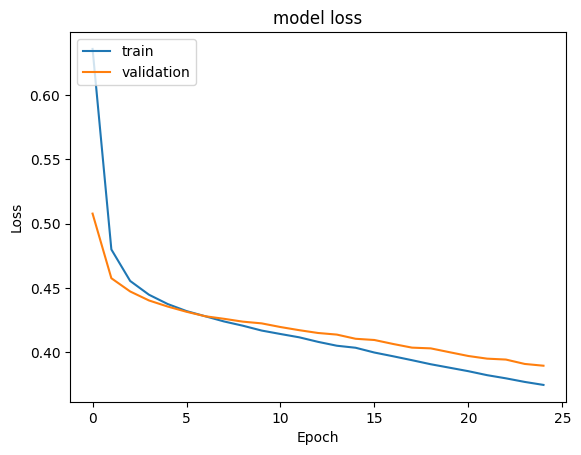

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

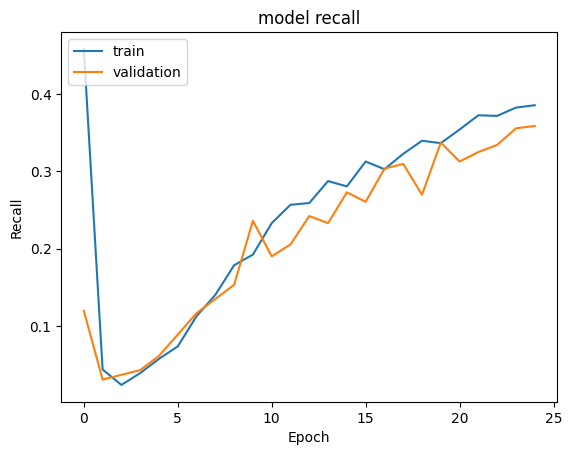

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_1.history['recall'])
plt.plot(history_1.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
model_name = "NN with Adam"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification Report**

In [ ]:
#Classification report for train
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      5096
           1       0.71      0.39      0.51      1304

    accuracy                           0.84      6400
   macro avg       0.78      0.68      0.71      6400
weighted avg       0.83      0.84      0.83      6400



In [ ]:
#classification report on validation set
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1274
           1       0.66      0.21      0.31       326

    accuracy                           0.82      1600
   macro avg       0.74      0.59      0.60      1600
weighted avg       0.79      0.82      0.78      1600



**Confusion Matrix**

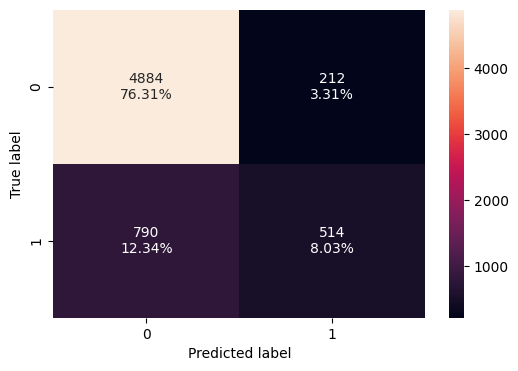

In [ ]:
#confusion matrix for training set
make_confusion_matrix(y_train, y_train_pred)

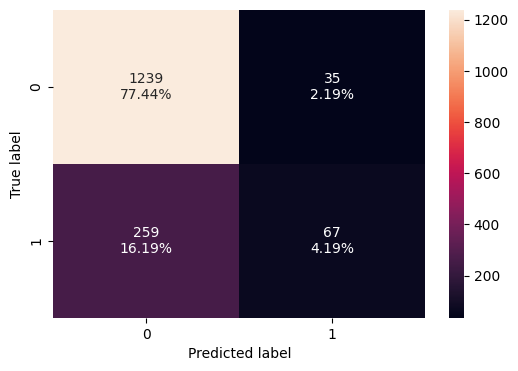

In [ ]:
# confusion matrix for validation set
make_confusion_matrix(y_val, y_val_pred)

### Neural Network with Adam Optimizer and Dropout

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_2 = Sequential()
#Adding the input layer with 32 neurons and relu as activation function
model_2.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
# Complete the code to add dropout with ratio of 0.2
model_2.add(Dropout(0.2))
# Adding a hidden layer with 64 neurons and relu activation function
model_2.add(Dense(64, activation='relu'))
# Adding a hidden layer with 32 neurons and relu activation function
model_2.add(Dense(32, activation='relu'))
# Adding dropout with ratio of 0.1
model_2.add(Dropout(0.1))
# Adding a hidden layer with 16 neurons and relu activation function
model_2.add(Dense(16, activation='relu'))
# Adding the output layer with 1 neuron and sigmoid activation function
model_2.add(Dense(1, activation='sigmoid'))

In [ ]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# define recall as the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [ ]:
## Complete the code to compile the model with binary cross entropy as loss function and recall as the metric.
model_2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
# Summary of the model
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 1

In [ ]:
#Fitting the ANN with batch_size = 25 and 64 epochs
history_2 = model_2.fit(
    X_train,y_train,
    batch_size=64,  ##64 batch size.
    epochs=25, ## 25 of epochs.
    verbose=1,
    validation_data=(X_val,y_val)
)

Epoch 1/25
100/100 [==============================] - 3s 10ms/step - loss: 0.4936 - recall: 0.0176 - val_loss: 0.4476 - val_recall: 0.0000e+00
Epoch 2/25
100/100 [==============================] - 1s 8ms/step - loss: 0.4416 - recall: 0.0698 - val_loss: 0.4325 - val_recall: 0.0890
Epoch 3/25
100/100 [==============================] - 0s 4ms/step - loss: 0.4336 - recall: 0.1687 - val_loss: 0.4259 - val_recall: 0.1718
Epoch 4/25
100/100 [==============================] - 0s 5ms/step - loss: 0.4304 - recall: 0.2009 - val_loss: 0.4235 - val_recall: 0.2638
Epoch 5/25
100/100 [==============================] - 0s 5ms/step - loss: 0.4249 - recall: 0.2354 - val_loss: 0.4171 - val_recall: 0.1933
Epoch 6/25
100/100 [==============================] - 0s 5ms/step - loss: 0.4165 - recall: 0.2715 - val_loss: 0.4109 - val_recall: 0.3037
Epoch 7/25
100/100 [==============================] - 0s 4ms/step - loss: 0.4130 - recall: 0.2937 - val_loss: 0.4049 - val_recall: 0.3650
Epoch 8/25
100/100 [=========

**Loss Function**

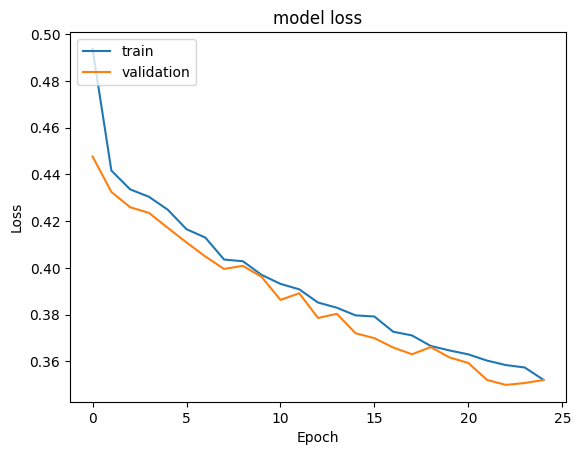

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

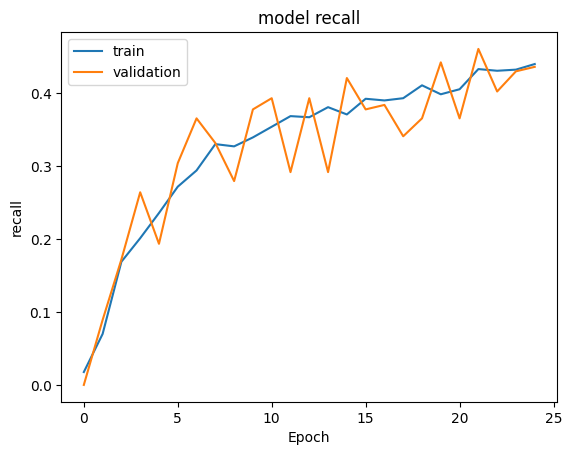

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_2.history['recall'])
plt.plot(history_2.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification Report**

In [ ]:
#classification report for training set
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5096
           1       0.80      0.49      0.60      1304

    accuracy                           0.87      6400
   macro avg       0.84      0.73      0.76      6400
weighted avg       0.86      0.87      0.86      6400



In [ ]:
#classification report for validation set
cr = classification_report(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1274
           1       0.78      0.44      0.56       326

    accuracy                           0.86      1600
   macro avg       0.83      0.70      0.74      1600
weighted avg       0.85      0.86      0.84      1600



**Confusion Matrix**

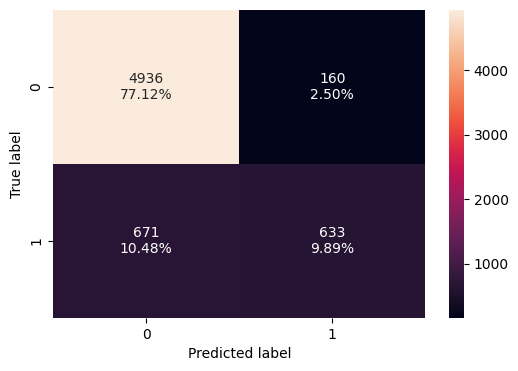

In [ ]:
#confusion matrix for training set
make_confusion_matrix(y_train, y_train_pred)

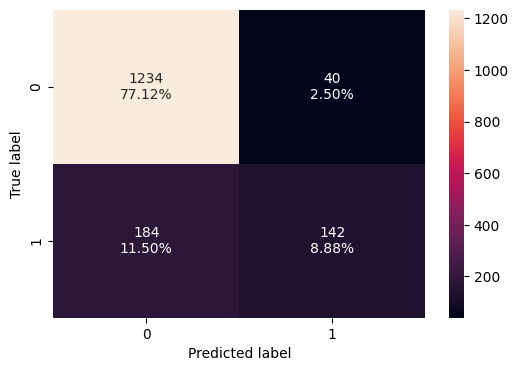

In [ ]:
#confusion matrix for validation set
make_confusion_matrix(y_val, y_val_pred)

####**Observations:**

* The model achieves high precision for class 0 (customers not likely to exit) in both the training and validation sets, indicating that when it predicts customers will stay, it is correct most of the time.
* However, the precision for class 1 (customers likely to exit) is lower, especially in the validation set, indicating that the model's predictions for customers who are likely to exit are less reliable.
* The recall for class 0 is high in both sets, indicating that the model correctly identifies the majority of customers who are not likely to exit.
* However, the recall for class 1 is notably lower, particularly in the validation set, suggesting that the model misses a significant portion of customers who are likely to exit.

####**Conclusions:**

* While the model performs well in identifying customers who are not likely to exit (class 0), it struggles to correctly identify customers who are likely to exit (class 1).
* The lower recall for class 1 suggests that the model misses a substantial number of customers who are likely to churn, which could result in missed opportunities for intervention or targeted retention strategies.
* To improve the model's performance, particularly in identifying customers at risk of churn, further optimization may be necessary.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

**Applying SMOTE to balance the dataset, then applying hyperparameter tuning**

In [ ]:
sm  = SMOTE(random_state=42)
#Complete the code to fit SMOTE on the training data.
X_train_smote, y_train_smote= sm.fit_resample(X_train,y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192,) 



In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
# Initializing the model
model_3 = Sequential()
# Adding the input layer with 64 neurons and activation function relu
model_3.add(Dense(64, activation='relu', input_dim=X_train_smote.shape[1]))
# Adding a hidden layer with 16 neurons and relu activation function
model_3.add(Dense(16, activation='relu'))
# Adding another hidden layer with 32 neurons and relu activation function
model_3.add(Dense(32, activation='relu'))
# Adding the output layer with the required number of neurons and sigmoid activation function
model_3.add(Dense(1, activation='sigmoid'))

In [ ]:
# defining SGD as the optimizer and learning rate of 0.001
optimizer = tf.keras.optimizers.SGD(0.001)

# defining recall as the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [ ]:
# Compiling the model with binary cross entropy as loss function and recall as the metric
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2385 (9.32 KB)
Trainable params: 2385 (9.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Fitting the ANN
history_3 = model_3.fit(
    X_train_smote, y_train_smote,
    batch_size=64, ## Complete the code to specify the batch size to use
    epochs=25, ## Complete the code to specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/25
160/160 [==============================] - 2s 6ms/step - loss: 0.7179 - recall: 0.0581 - val_loss: 0.6704 - val_recall: 0.0521
Epoch 2/25
160/160 [==============================] - 1s 7ms/step - loss: 0.7145 - recall: 0.0675 - val_loss: 0.6722 - val_recall: 0.0644
Epoch 3/25
160/160 [==============================] - 1s 7ms/step - loss: 0.7116 - recall: 0.0742 - val_loss: 0.6735 - val_recall: 0.0706
Epoch 4/25
160/160 [==============================] - 1s 7ms/step - loss: 0.7090 - recall: 0.0781 - val_loss: 0.6745 - val_recall: 0.0706
Epoch 5/25
160/160 [==============================] - 1s 5ms/step - loss: 0.7068 - recall: 0.0818 - val_loss: 0.6754 - val_recall: 0.0798
Epoch 6/25
160/160 [==============================] - 1s 4ms/step - loss: 0.7048 - recall: 0.0899 - val_loss: 0.6757 - val_recall: 0.0828
Epoch 7/25
160/160 [==============================] - 1s 4ms/step - loss: 0.7029 - recall: 0.0912 - val_loss: 0.6762 - val_recall: 0.0920
Epoch 8/25
160/160 [==============

**Loss Function**

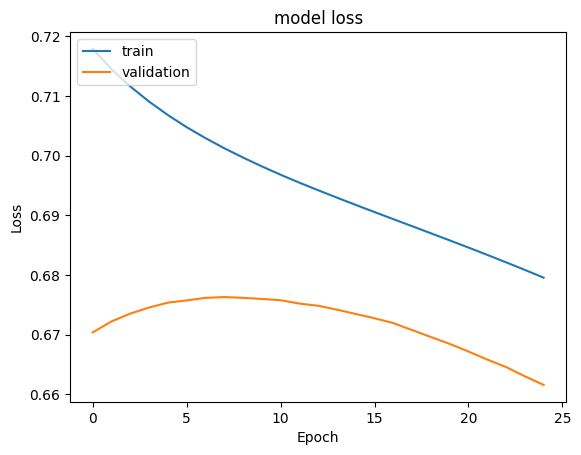

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

In [ ]:
# printing key history in the history_3.history dictionary
print(history_3.history.keys())

dict_keys(['loss', 'recall', 'val_loss', 'val_recall'])


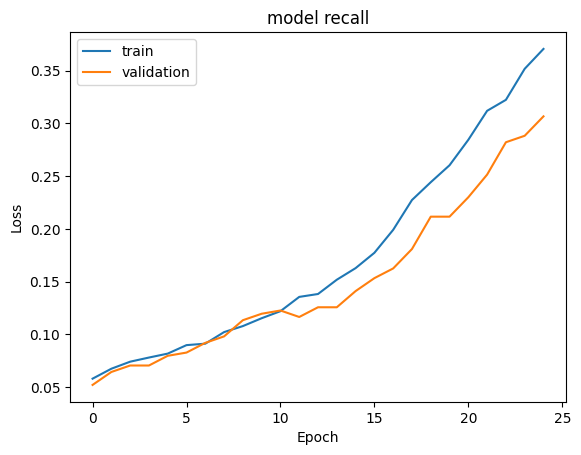

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_train_pred = model_3.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 [==============================] - 1s 3ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [ ]:
y_val_pred = model_3.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [ ]:
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification Report**

In [ ]:
# classification report for training set
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.59      0.88      0.70      5096
           1       0.76      0.38      0.51      5096

    accuracy                           0.63     10192
   macro avg       0.67      0.63      0.61     10192
weighted avg       0.67      0.63      0.61     10192



In [ ]:
#classification report for validation set
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1274
           1       0.38      0.31      0.34       326

    accuracy                           0.76      1600
   macro avg       0.61      0.59      0.60      1600
weighted avg       0.74      0.76      0.75      1600



**Confusion Matrix**

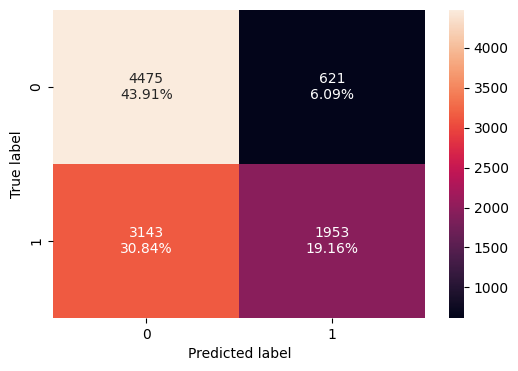

In [ ]:
#Calculating the confusion matrix for train
make_confusion_matrix(y_train_smote, y_train_pred)

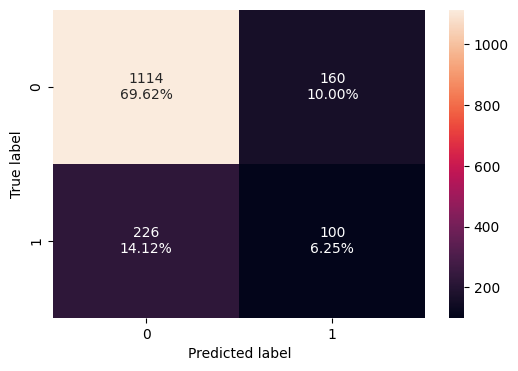

In [ ]:
#Calculating the confusion matrix for validation
make_confusion_matrix(y_val, y_val_pred)

####**Observations:**

* The model performs better on classifying class 0 instances compared to class 1 instances, as evident from the higher precision, recall, and F1-score for class 0.
* There is a notable drop in performance from the training set to the validation set, indicating potential overfitting. The model may be fitting too closely to the training data, resulting in poor generalization to unseen data.
* The class imbalance seems to be affecting the performance, particularly for class 1, where the precision, recall, and F1-score are lower compared to class 0.



####**Conclusions:**
* Applying SMOTE helped balance the training data, improving the model's ability to predict exiting customers.
* Further optimization, such as hyperparameter tuning, feature engineering, or using techniques like stratified sampling, may be necessary to improve the model's performance, especially in handling class imbalance and overfitting issues

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
# Initializing the model
model_4 = Sequential()

# Adding the input layer with 32 neurons and activation function relu
model_4.add(Dense(32, activation='relu', input_dim=X_train_smote.shape[1]))

# Adding a hidden layer with 14 neurons and tanh activation function
model_4.add(Dense(14, activation='relu'))

# Adding another hidden layer with 7 neurons and relu activation function
model_4.add(Dense(7, activation='relu'))

# Adding the output layer with 1 neuron and sigmoid activation function
model_4.add(Dense(1, activation='sigmoid'))

In [ ]:
# Summary of the model
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 14)                462       
                                                                 
 dense_2 (Dense)             (None, 7)                 105       
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 959 (3.75 KB)
Trainable params: 959 (3.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# setting learning rate
lr=1e-4

In [ ]:
# Using Adam as the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [ ]:
# Compiling the model with binary cross-entropy as the loss function and recall as the metric
model_4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])

In [ ]:
# Fitting the ANN
history_4 = model_4.fit(
    X_train_smote, y_train_smote,
    batch_size=64,  # batch size
    epochs=25,      # number of epochs
    verbose=1,
    validation_data=(X_val, y_val)
)

Epoch 1/25
160/160 [==============================] - 2s 5ms/step - loss: 0.6982 - recall: 0.8634 - val_loss: 0.7262 - val_recall: 0.8712
Epoch 2/25
160/160 [==============================] - 1s 4ms/step - loss: 0.6788 - recall: 0.8562 - val_loss: 0.7104 - val_recall: 0.8558
Epoch 3/25
160/160 [==============================] - 1s 5ms/step - loss: 0.6608 - recall: 0.8377 - val_loss: 0.6887 - val_recall: 0.7883
Epoch 4/25
160/160 [==============================] - 1s 5ms/step - loss: 0.6381 - recall: 0.7716 - val_loss: 0.6540 - val_recall: 0.7055
Epoch 5/25
160/160 [==============================] - 1s 5ms/step - loss: 0.6131 - recall: 0.7300 - val_loss: 0.6249 - val_recall: 0.6564
Epoch 6/25
160/160 [==============================] - 1s 4ms/step - loss: 0.5927 - recall: 0.7204 - val_loss: 0.6063 - val_recall: 0.6656
Epoch 7/25
160/160 [==============================] - 1s 5ms/step - loss: 0.5780 - recall: 0.7180 - val_loss: 0.5960 - val_recall: 0.6656
Epoch 8/25
160/160 [==============

**Loss Function**

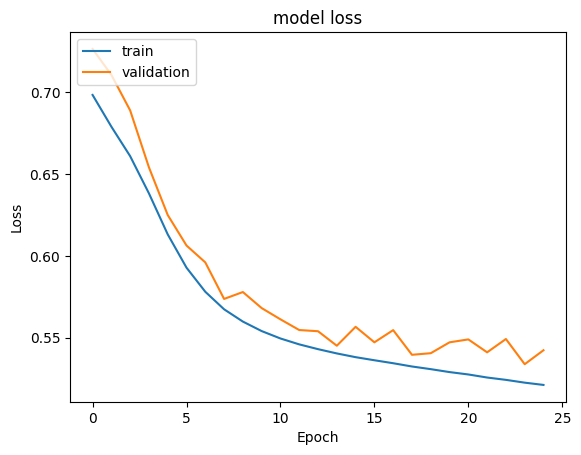

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

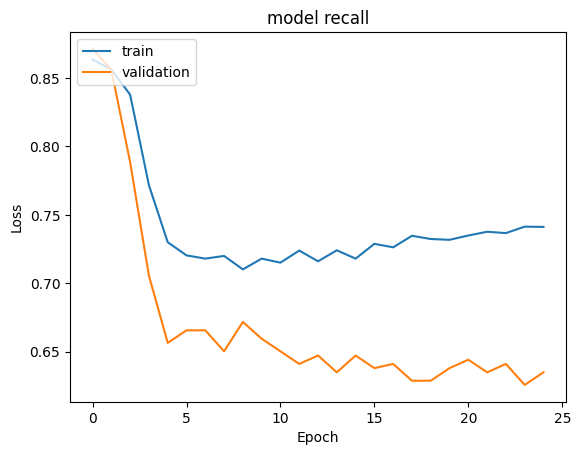

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_4.history['recall'])
plt.plot(history_4.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_4.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 [==============================] - 1s 2ms/step


array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
#Predicting the results using 0.5 as the threshold
y_val_pred = model_4.predict(X_val)

y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
# adding to model comparison
model_name = "NN with SMOTE & Adam"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification Report**

In [ ]:
#check the model's performance on the training set
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.74      0.75      0.75      5096
           1       0.75      0.74      0.74      5096

    accuracy                           0.74     10192
   macro avg       0.74      0.74      0.74     10192
weighted avg       0.74      0.74      0.74     10192



In [ ]:
#check the model's performance on the validation set
cr=classification_report(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1274
           1       0.39      0.63      0.48       326

    accuracy                           0.72      1600
   macro avg       0.64      0.69      0.65      1600
weighted avg       0.79      0.72      0.74      1600



**Confusion Matrix**

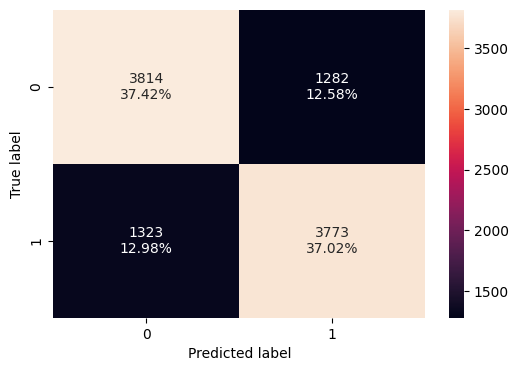

In [ ]:
#Calculating the confusion matrix for train data
make_confusion_matrix(y_train_smote, y_train_pred)

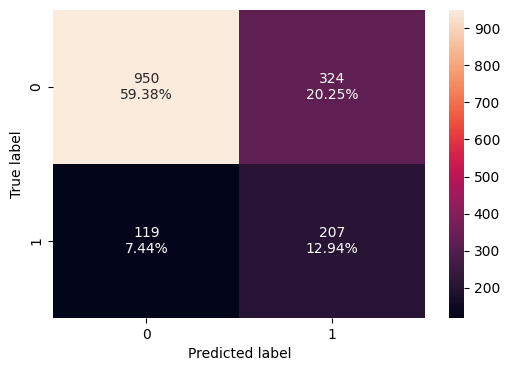

In [ ]:
#Calculating the confusion matrix for validation data
make_confusion_matrix(y_val, y_val_pred)

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the model
model_5 = Sequential()
# Complete the code to add required # of neurons to the input layer with relu as activation function
model_5.add(Dense(64,activation='relu',input_dim = X_train_smote.shape[1]))
#Complete the code to add dropout rate
model_5.add(Dropout(0.2))
# Complete the code to add required # neurons to the hidden layer with any activation function.
model_5.add(Dense(32,activation='relu'))
# Complete the code to add dropout rate.
model_5.add(Dropout(0.3))
# Adding hidden layer with 8 neurons with relu as activation function
model_5.add(Dense(8,activation='relu'))
# Complete the code to add the required number of neurons in the output layer with a suitable activation function.
model_5.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# setting the learning rate
lr=1e-4

In [ ]:
#Using Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [ ]:
# Compiling the model with binary cross entropy as loss function and recall as the metric
model_5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
# Summary of the model
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3121 (12.19 KB)
Trainable params: 3121 (12

In [ ]:
# Fitting the ANN
history_5 = model_5.fit(
    X_train_smote, y_train_smote,
    batch_size=64,  # batch size
    epochs=25,      # number of epochs
    verbose=1,
    validation_data=(X_val, y_val)
)

**Loss Function**

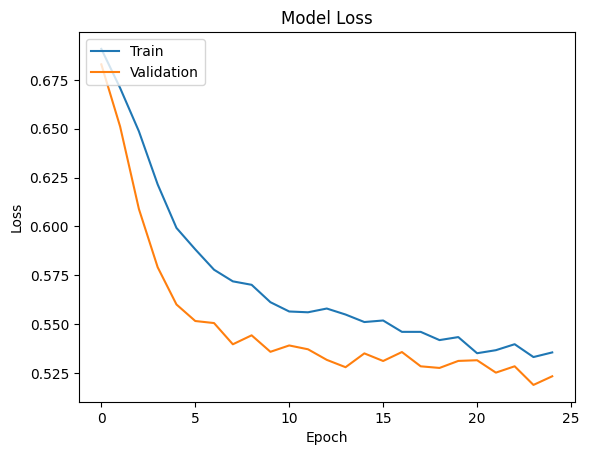

In [ ]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Recall**

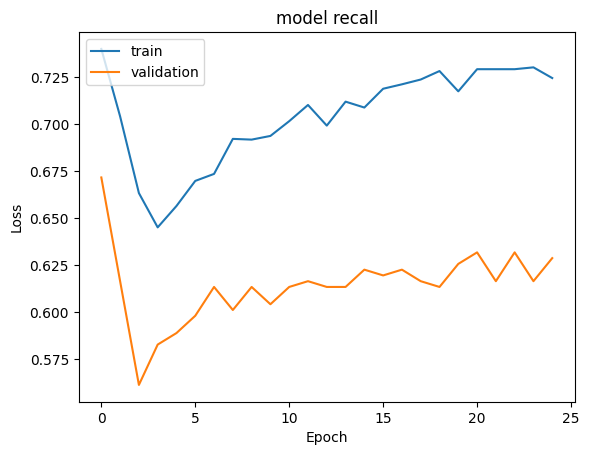

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_5.history['recall'])
plt.plot(history_5.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_train_pred = model_5.predict(X_train_smote)
#Predicting the training results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 [==============================] - 1s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_5.predict(X_val)
#Predicting the validation results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
model_name = "NN with SMOTE,Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification Report**

In [ ]:
# classification for model performance on training set
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      5096
           1       0.77      0.72      0.74      5096

    accuracy                           0.75     10192
   macro avg       0.75      0.75      0.75     10192
weighted avg       0.75      0.75      0.75     10192



In [ ]:
# classification for model performance on validation set
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1274
           1       0.41      0.63      0.50       326

    accuracy                           0.74      1600
   macro avg       0.65      0.70      0.66      1600
weighted avg       0.79      0.74      0.76      1600



**Confusion Matrix**

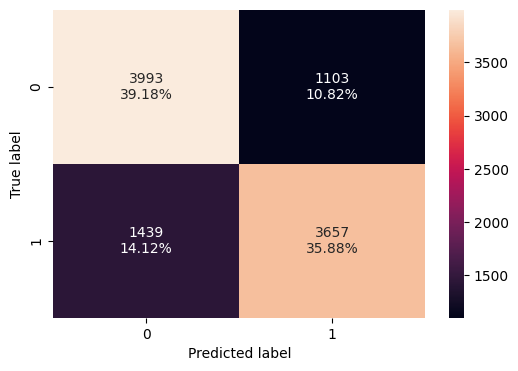

In [ ]:
#Calculating the confusion matrix for training data
make_confusion_matrix(y_train_smote, y_train_pred)

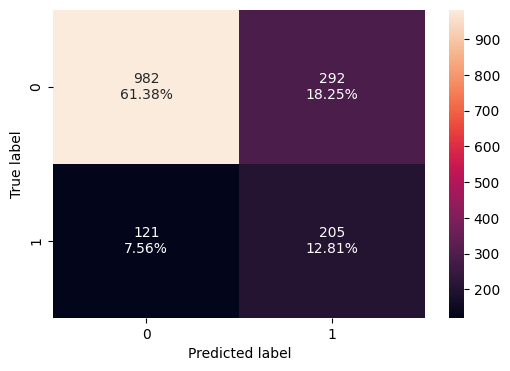

In [ ]:
#Calculating the confusion matrix for validiation data
make_confusion_matrix(y_val, y_val_pred)

## Model Performance Comparison and Final Model Selection

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
model.summary()

In [ ]:
print("Training performance comparison")
train_metric_df

In [ ]:
print("Validation set performance comparison")
valid_metric_df

In [ ]:
train_metric_df - valid_metric_df

In [ ]:
y_test_pred = model_performance.predict(X_test)    ## Complete the code to specify the best model
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

In [ ]:
#lets print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

## Actionable Insights and Business Recommendations

##**Insights**

**Geography:**
  * There is significant variation in exit rates across different geographical regions.
  * Germany has the highest exit rate, followed by Spain and France.

**Gender:**
  * Female customers have a higher exit rate compared to male customers.

**Credit Card Ownership:**
* Credit card ownership alone does not significantly impact churn rates.

**Active Customers:**
* Inactive members have a significantly higher exit rate compared to active members.

**Credit Score:**
* Credit score alone does not have a major impact on churn, but there were some customers with significantly lower scores who exited.

**Age:**
* Older customers are more likely to leave the bank than middle-aged customers.

**Correlation Insights:**
* There is a moderate correlation between the number of products and account balance.

**Tenure:**
* On average, customers tend to remain with the bank for around 5 years before making a decision to leave or stay.

**Account Balance:**
* There are a significant number of customers who maintain accounts with zero balances, suggesting various reasons for doing so.


##**Conclusions:**

**Geography:**
* Localized Retention Strategies: Develop retention strategies tailored to each region's cultural nuances, economic conditions, and competitive landscape. For instance, offer region-specific promotions or discounts to incentivize customer loyalty.
* Market Analysis: Conduct in-depth market analysis to identify the unique drivers of churn in each region. This may involve gathering feedback from customers, studying competitor offerings, and assessing regulatory factors impacting customer behavior.

**Gender:**
* Targeted Communication: Design targeted communication campaigns to address the specific needs and preferences of female customers. This could involve sending personalized offers, discounts, or educational materials that resonate with their financial goals and aspirations.
* Customer Feedback: Collect feedback from female customers to understand their pain points and areas for improvement. Use this feedback to refine products, services, and customer experiences to better meet their needs.

**Active Customers:**
* Engagement Initiatives: Implement proactive engagement initiatives to re-activate inactive customers. This may include personalized outreach, exclusive offers, or loyalty programs designed to incentivize increased activity.
* Usage Analysis: Analyze patterns of inactivity to identify common reasons why customers disengage. Use this analysis to develop targeted solutions that address underlying issues and encourage sustained usage.

**Credit Score:**
* Credit-Building Products: Offer specialized financial products or services designed to help customers improve their credit scores over time. This could include credit-building loans, secured credit cards, or financial literacy programs tailored to customers with lower credit scores.
* Financial Education: Provide educational resources and workshops focused on credit management and financial responsibility. Empowering customers with knowledge and tools to improve their creditworthiness can enhance loyalty and trust in the bank.

**Age:**
* Tailored Services: Segment customers by age and personalize service offerings to cater to their unique needs and preferences. For example, offer retirement planning services or senior-friendly banking features for older customers.
* Retention Incentives: Develop retention incentives such as loyalty rewards or preferential rates for long-standing customers. Recognizing and rewarding customer loyalty can strengthen relationships and reduce churn among older demographics.

**Correlation Insights:**
* Product Diversification: Leverage insights from the correlation between the number of products and account balance to design bundled product packages that cater to diverse customer needs. Encourage cross-selling and upselling opportunities to increase product adoption and deepen customer relationships.
* Customer Segmentation: Segment customers based on their product preferences and financial behaviors. Tailor marketing campaigns and product recommendations to each segment to maximize engagement and satisfaction.

**Tenure:**
* Lifecycle Marketing: Implement lifecycle marketing strategies to nurture customer relationships at different stages of their tenure with the bank. This may involve personalized communications, milestone celebrations, and targeted offers aligned with the customer's journey.
* Retention Programs: Develop retention programs that reward long standing customers for their loyalty. Consider offering loyalty tiers with escalating benefits based on tenure, encouraging customers to remain engaged with the bank over time.

**Account Balance:**
* Value-added Services: Offer additional services such as financial planning consultations, investment advisory, or wealth management solutions to customers with higher balances. Mke sure the customers look at the bank as a trusted financial partner capable of addressing their complex financial needs.
* Zero-Balance Solutions: Introduce solutions to incentivize activity among customers with zero balances such as fee waivers, cashback rewards, or referral bonuses for customers who maintain a minimum balance or engage with additional bank products and services.

<font size=6 color='blue'>Power Ahead</font>
___